# Part 1 - Data Processing

In [66]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
#Importing the training set
training_set=pd.read_csv('Google_Stock_Price_Train.csv')

In [68]:
#we will be predicting the opening price
#just read the column index 1, and since we need a matrix 1:2
training_set=training_set.iloc[:,1:2].values

In [69]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set_scaled=sc.fit_transform(training_set)

In [70]:
# creating a data structure with 20 timesteps and t+1 output
X_train=[]
y_train=[]
for i in range(20,1258):
    X_train.append(training_set_scaled[i-20:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [71]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# Part 2 - Buidling the RNN

In [84]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [85]:
# Initialising the RNN
regressor = Sequential()

In [86]:
# Adding the input layer and the LSTM layer
#units -> no of memory units
#input_shape -> (timestep,no of features) , None= any timestap
#if there is another LSTM layer after this, we need to set return_sequences=True
# if the next layer is a fully connected layer remove it
regressor.add(LSTM(units=3,input_shape= (None,1),activation='sigmoid'  ))

In [87]:
#adding the output layer
regressor.add(Dense(units=1))

In [88]:
#compiling the RNN

In [89]:
#optimizer, most of the cases rmsprop is recommended with RNN
#loss, eince we are performing a regression, mean squared error
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [90]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1238/1238 [==============================] - 0s - loss: 0.5699     
Epoch 2/200
1238/1238 [==============================] - 0s - loss: 0.4206     
Epoch 3/200
1238/1238 [==============================] - 0s - loss: 0.3031     
Epoch 4/200
1238/1238 [==============================] - 0s - loss: 0.2107     
Epoch 5/200
1238/1238 [==============================] - 0s - loss: 0.1407     
Epoch 6/200
1238/1238 [==============================] - 0s - loss: 0.0931     
Epoch 7/200
1238/1238 [==============================] - 0s - loss: 0.0664     
Epoch 8/200
1238/1238 [==============================] - 0s - loss: 0.0550     
Epoch 9/200
1238/1238 [==============================] - 0s - loss: 0.0502     
Epoch 10/200
1238/1238 [==============================] - 0s - loss: 0.0465     
Epoch 11/200
1238/1238 [==============================] - 0s - loss: 0.0428     
Epoch 12/200
1238/1238 [==============================] - 0s - loss: 0.0391     
Epoch 13/200
1238/1238 [=============

1238/1238 [==============================] - 0s - loss: 3.3056e-04     
Epoch 99/200
1238/1238 [==============================] - 0s - loss: 3.3490e-04     
Epoch 100/200
1238/1238 [==============================] - 0s - loss: 3.2831e-04     
Epoch 101/200
1238/1238 [==============================] - 0s - loss: 3.2835e-04     
Epoch 102/200
1238/1238 [==============================] - 0s - loss: 3.2881e-04     
Epoch 103/200
1238/1238 [==============================] - 0s - loss: 3.2996e-04     
Epoch 104/200
1238/1238 [==============================] - 0s - loss: 3.2954e-04     
Epoch 105/200
1238/1238 [==============================] - 0s - loss: 3.2744e-04     
Epoch 106/200
1238/1238 [==============================] - 0s - loss: 3.2469e-04     
Epoch 107/200
1238/1238 [==============================] - 0s - loss: 3.2776e-04     
Epoch 108/200
1238/1238 [==============================] - 0s - loss: 3.2629e-04     
Epoch 109/200
1238/1238 [==============================] - 0s - loss:

1238/1238 [==============================] - 0s - loss: 2.9543e-04     
Epoch 194/200
1238/1238 [==============================] - 0s - loss: 2.8865e-04     
Epoch 195/200
1238/1238 [==============================] - 0s - loss: 2.9339e-04     
Epoch 196/200
1238/1238 [==============================] - 0s - loss: 2.9189e-04     
Epoch 197/200
1238/1238 [==============================] - 0s - loss: 2.9126e-04     
Epoch 198/200
1238/1238 [==============================] - 0s - loss: 2.9341e-04     
Epoch 199/200
1238/1238 [==============================] - 0s - loss: 2.8856e-04     
Epoch 200/200
1238/1238 [==============================] - 0s - loss: 2.9381e-04     


# Part 3 - Making the Predictions and Visualizing the results

In [91]:
# Getting the real stock price of 2017
test_set=pd.read_csv('Google_Stock_Price_Test.csv')
test_set=test_set.iloc[:,1:2].values

In [92]:
real_stock_price=np.concatenate((training_set[0:1258],test_set), axis=0)
scaled_real_stock_price=sc.fit_transform(real_stock_price)

In [93]:
# creating a data structure with 20 timesteps and t+1 output
inputs=[]
for i in range(1258,1278):
    inputs.append(scaled_real_stock_price[i-20:i,0])
inputs=np.array(inputs)
inputs=np.reshape(inputs,(inputs.shape[0],inputs.shape[1],1))

In [94]:
predicted_stock_price=regressor.predict(inputs)

In [95]:
#apply inverse transformations to get the actual price
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

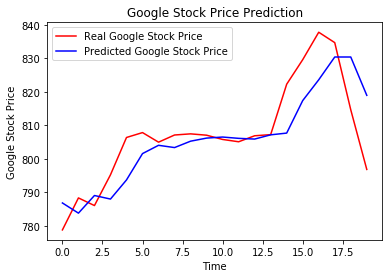

In [96]:
#visualizing the results
plt.plot(real_stock_price[1258:],color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Part 4 - Evaluating the RNN

In [62]:
import math
from sklearn.metrics import mean_squared_error

In [64]:
rmse=math.sqrt(mean_squared_error(real_stock_price[1258:],predicted_stock_price))

In [65]:
#percentage error
#average price is around 800
rmse/800

0.26328856356533403